In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
data.data.shape

(569, 30)

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
import sklearn.model_selection as ms

In [16]:
X_train, X_test, y_train, y_test = ms.train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(455, 30)

In [18]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

In [19]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
dtc.score(X_train, y_train)

1.0

In [22]:
dtc.score(X_test, y_test)

0.9298245614035088

In [23]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(dtc, 
                                                out_file=f,
                                                feature_names=data.feature_names,
                                                class_names=data.target_names)

In [24]:
import numpy as np
max_depths = np.array([1,2,3,5,7,9,11])

In [27]:
train_score = []
test_score = []
for d in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=d)
    dtc.fit(X_train,y_train)
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

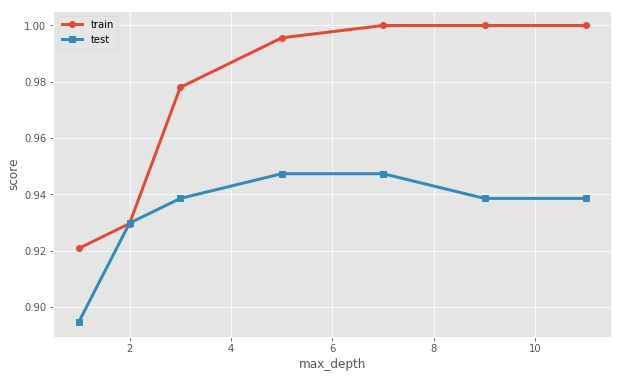

In [32]:
plt.figure(figsize=(10,6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()

In [35]:
from sklearn.datasets import make_classification

In [40]:
X, y = make_classification(n_samples=100,
                                              n_features=2,
                                              n_redundant=0,
                                              n_classes=2,
                                              random_state=78)

Text(0, 0.5, 'y labels')

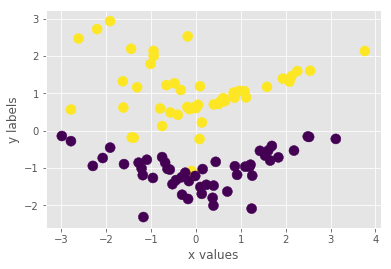

In [41]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y labels')

In [42]:
X = X.astype(np.float32)
y = y * 2 -1

In [43]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
import cv2 as cv

In [46]:
svm = cv.ml.SVM_create()

In [48]:
svm.setKernel(cv.ml.SVM_LINEAR)

In [50]:
svm.train(X_train, cv.ml.ROW_SAMPLE, y_train)

True

In [51]:
_, y_pred = svm.predict(X_test)

In [52]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.95